In [61]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec

from copy import copy
from matplotlib.colors import LogNorm

In [2]:
label = "var_theta_phi"
N_Events = 10_000

In [3]:
mypreds = np.load("./%s/predictions.npy"%(label))                                                                                                                                  
Y_test = np.load("./%s/y_test.npy"%(label)) 
X_test = np.load("./%s/x_test.npy"%(label))

|        |        |        |  Calo Image  |           |           |
|:------:|:------:|:------:|:------------:|:---------:|:---------:|
| Cell E | Cell X | Cell Y | Cell 'Depth' | Layer 1 Z | Layer 2 Z |
|    0   |    1   |    2   |       3      |     4     |     5     |

In [123]:
L1_mean = 4090.
L2_mean = 4380.

L1_StDev = 0.64
L2_StDev = 0.9

In [124]:
Dif = np.abs(Y_test[:N_Events]-mypreds[:N_Events,0])

layer1_z = np.ravel(X_test[:N_Events,4,0])
layer2_z = np.ravel(X_test[:N_Events,5,0])

layer1_z = layer1_z*L1_StDev + L1_mean
layer2_z = layer2_z*L2_StDev + L2_mean

ldif = (np.ravel(layer2_z)-np.ravel(layer1_z))
#taking first element b/c all hits in same image share segmentation parameters

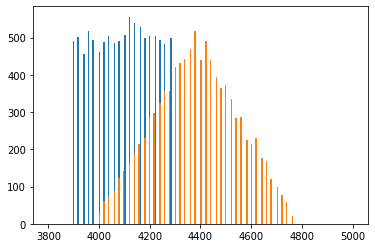

In [128]:
_ = plt.hist(np.ravel(layer1_z),bins=np.linspace(3800,5000,201))
_ = plt.hist(np.ravel(layer2_z),bins=np.linspace(3800,5000,201))

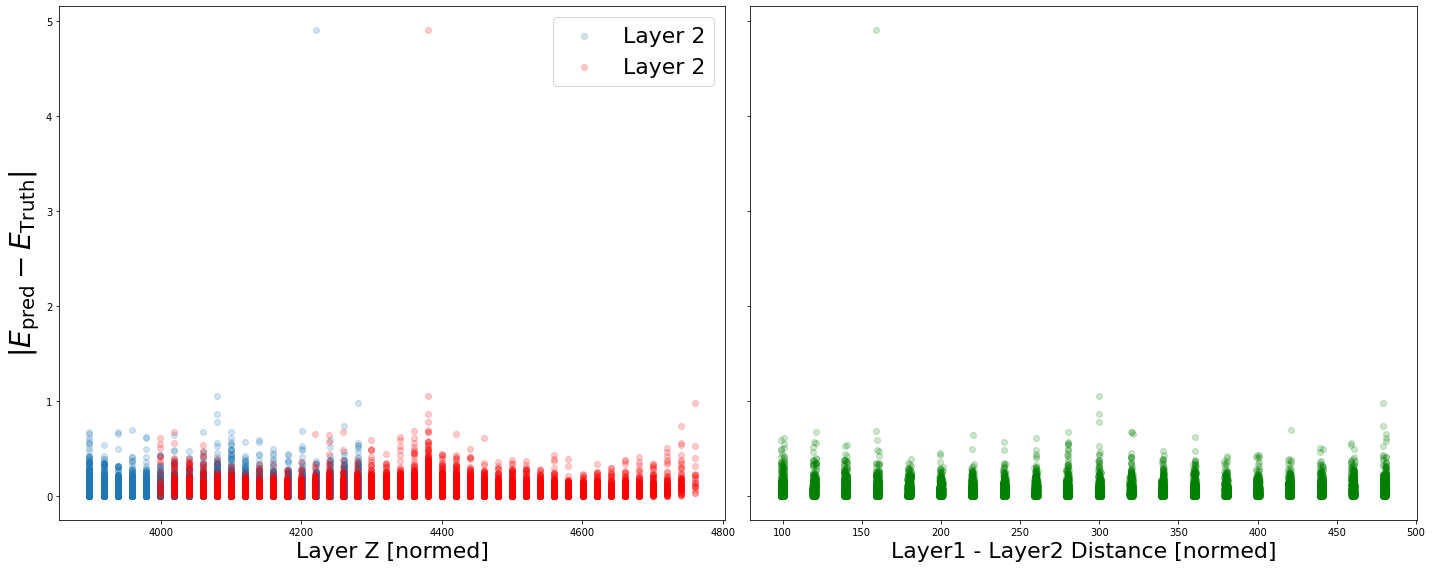

In [129]:
fig, axs = plt.subplots(nrows=1,ncols=2,sharey=True,figsize=(20,8))
axs[0].scatter(np.ravel(layer1_z),Dif,alpha=0.2,label="Layer 2")
axs[0].scatter(np.ravel(layer2_z),Dif,alpha=0.2,color='red',label="Layer 2")
axs[0].set_ylabel("$|E_\mathrm{pred}-E_\mathrm{Truth}|$",fontsize=28)
axs[0].set_xlabel("Layer Z [normed]",fontsize=22)
axs[0].legend(fontsize=22)
axs[1].scatter(ldif,Dif,alpha=0.2,color='green',label="Layer 2")
axs[1].set_xlabel("Layer1 - Layer2 Distance [normed]",fontsize=22)
plt.tight_layout()
#plt.ylabel()

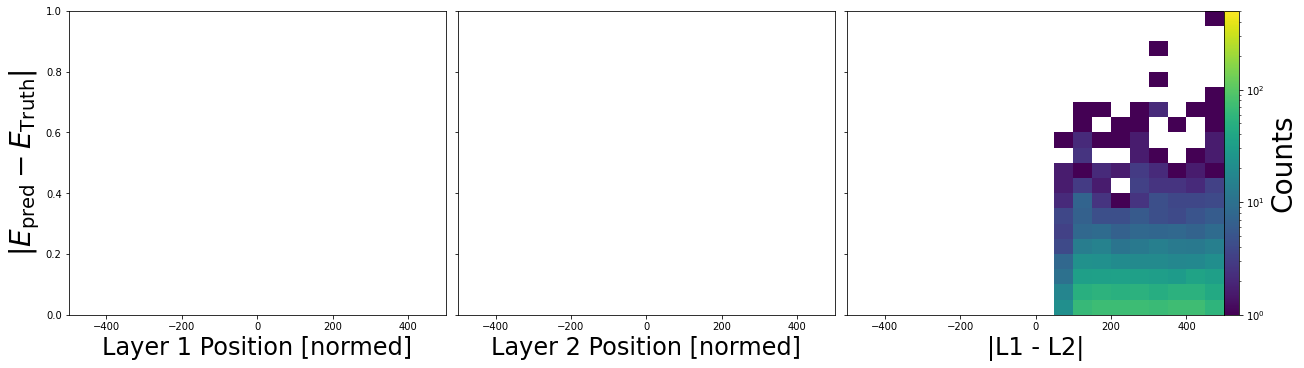

In [130]:
N_Bins = 21
xbins = np.linspace(-500,500,N_Bins)
ybins = np.linspace(0,1,N_Bins)
cmap = copy(plt.cm.viridis)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5), constrained_layout=True,sharey=True)
h1, xedges1, yedges1 = np.histogram2d(layer1_z, Dif,bins=(xbins,ybins))
h2, xedges2, yedges2 = np.histogram2d(layer2_z, Dif, bins=(xbins,ybins))
h3, xedges3, yedges3 = np.histogram2d(ldif, Dif, bins=(xbins,ybins))

pcm = axes[0].pcolormesh(xedges1, yedges1, h1.T, cmap=cmap, norm=LogNorm(vmin=1.0e0,vmax=5.0e2), rasterized=True)
axes[1].pcolormesh(xedges1, yedges1, h2.T, cmap=cmap, norm=LogNorm(vmin=1.0e0,vmax=1.0e4), rasterized=True)
axes[2].pcolormesh(xedges1, yedges1, h3.T, cmap=cmap, norm=LogNorm(vmin=1.0e0,vmax=1.0e4), rasterized=True)

axes[0].set_ylabel("$|E_\mathrm{pred}-E_\mathrm{Truth}|$",fontsize=28)
axes[0].set_xlabel("Layer 1 Position [normed]",fontsize=24)
axes[1].set_xlabel("Layer 2 Position [normed]",fontsize=24)
axes[2].set_xlabel("|L1 - L2|",fontsize=24)

#axes[1].set_ylabel("$\cos(2\phi)$",fontsize=22)
#axes[2].set_ylabel("$\cos(3\phi)$",fontsize=22)

cb = fig.colorbar(pcm, ax=axes, pad=0)
cb.set_label("Counts",fontsize=28)

In [131]:
L1_max = np.max(layer1_z)
L1_min = np.min(layer1_z)
L1_bins = np.linspace(L1_min,L1_max,N_Bins)
L1_digits = np.digitize(layer1_z,L1_bins)-1

L2_max = np.max(layer2_z)
L2_min = np.min(layer2_z)
L2_bins = np.linspace(L2_min,L2_max,N_Bins)
L2_digits = np.digitize(layer2_z,L2_bins)-1

LD_max = np.max(ldif)
LD_min = np.min(ldif)
LD_bins = np.linspace(LD_min,LD_max,N_Bins)
LD_digits = np.digitize(ldif,LD_bins)-1

In [132]:
L1_avg = np.zeros(N_Bins)
L1_sum = np.zeros(N_Bins)
L1_ERavg = np.zeros(N_Bins)
L1_ERsum = np.zeros(N_Bins)


L2_avg = np.zeros(N_Bins)
L2_sum = np.zeros(N_Bins)
L2_ERavg = np.zeros(N_Bins)
L2_ERsum = np.zeros(N_Bins)

LD_avg = np.zeros(N_Bins)
LD_sum = np.zeros(N_Bins)
LD_ERavg = np.zeros(N_Bins)
LD_ERsum = np.zeros(N_Bins)

for i in range(0,len(layer1_z)):
    
    L1Bin = L1_digits[i]
    L1_avg[L1Bin] += layer1_z[i]
    L1_sum[L1Bin] += 1
    L1_ERavg[L1Bin] += Dif[i]
    L1_ERsum[L1Bin] += 1
    
    L2Bin = L2_digits[i]
    L2_avg[L2Bin] += layer2_z[i]
    L2_sum[L2Bin] += 1
    L2_ERavg[L2Bin] += Dif[i]
    L2_ERsum[L2Bin] += 1
    
    LDBin = LD_digits[i]
    LD_avg[LDBin] += ldif[i]
    LD_sum[LDBin] += 1
    LD_ERavg[LDBin] += Dif[i]
    LD_ERsum[LDBin] += 1
    
print(L1_sum,L2_sum,LD_sum)   
L1_avg = L1_avg/L1_sum
L2_avg = L2_avg/L2_sum
LD_avg = LD_avg/LD_sum

L1_ERavg = L1_ERavg/L1_ERsum
L2_ERavg = L2_ERavg/L2_ERsum
LD_ERavg = LD_ERavg/LD_ERsum

[490. 502. 457. 517. 493. 460. 487. 505. 486. 492. 507. 556. 540. 529.
 498. 503. 503. 493. 482.   0. 500.] [ 85. 159. 264. 349. 443. 581. 680. 777. 874. 470. 958. 931. 760. 706.
 573. 439. 408. 289. 175.  59.  20.] [462. 501. 498. 498. 489. 521. 503. 519. 521. 516. 457. 485. 468. 477.
 505. 525. 524. 496. 521. 484.  30.]


/tmp/ipykernel_23333/3887168819.py:38: RuntimeWarning: invalid value encountered in true_divide
  L1_avg = L1_avg/L1_sum
/tmp/ipykernel_23333/3887168819.py:42: RuntimeWarning: invalid value encountered in true_divide
  L1_ERavg = L1_ERavg/L1_ERsum


Text(0.5, 0, 'Layer Z Position [mm]')

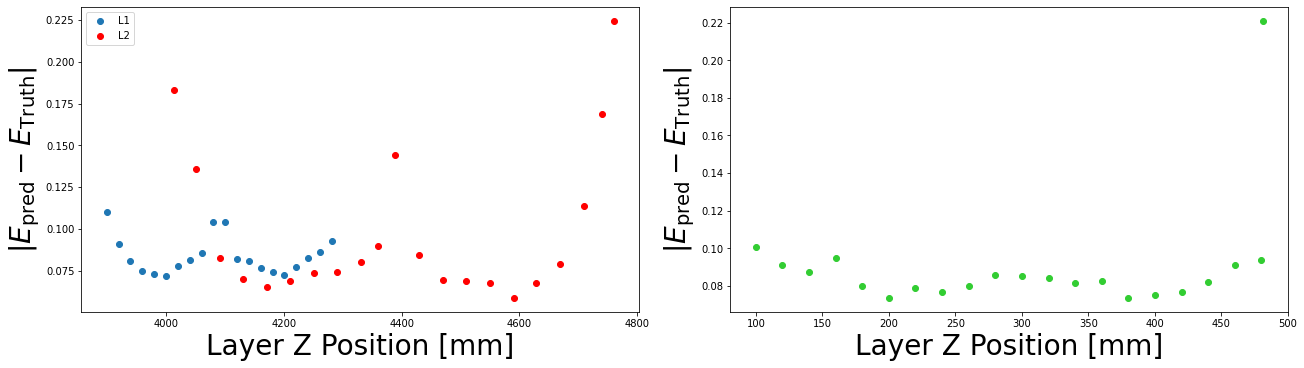

In [143]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 5), constrained_layout=True)

axes[0].scatter(L1_avg,L1_ERavg,label="L1")
axes[0].scatter(L2_avg,L2_ERavg,label="L2",color="red")
#plt.scatter(LD_avg,LD_ERavg,label="|L1-L2|",color="limegreen")
axes[0].legend()
axes[0].set_ylabel("$|E_\mathrm{pred}-E_\mathrm{Truth}|$",fontsize=28)
axes[0].set_xlabel("Layer Z Position [mm]",fontsize=28)

axes[1].scatter(LD_avg,LD_ERavg,label="|L1-L2|",color="limegreen")
axes[0].legend()
axes[1].set_ylabel("$|E_\mathrm{pred}-E_\mathrm{Truth}|$",fontsize=28)
axes[1].set_xlabel("Layer Z Position [mm]",fontsize=28)

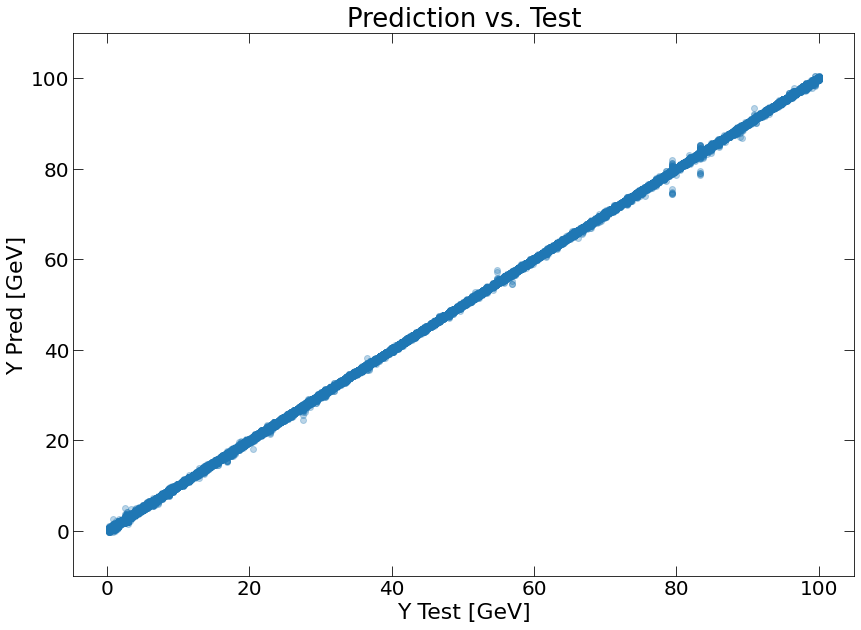

In [7]:
fig = plt.figure(figsize=(14,10))
plt.scatter(Y_test,mypreds,alpha=0.3)
plt.xlabel("Y Test [GeV]",fontsize=22)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tick_params(direction='in',right=True,top=True,length=10)
plt.ylim(-10,110)
plt.ylabel("Y Pred [GeV]",fontsize=22)
_ = plt.title("Prediction vs. Test",fontsize=26)